In [1]:
# Sprint 8
# 1.Referee Analysis

Top 10 Referees by Matches Officiated:
referee
Felix Zwayer         44
Marco Fritz          37
Daniel Siebert       37
Dr. Felix Brych      36
Manuel Graofe        33
Tobias Stieler       24
Guido Winkmann       24
Michael Tykgaard     24
Deniz Aytekin        23
Peter Kjaersgaard    20
Name: count, dtype: int64


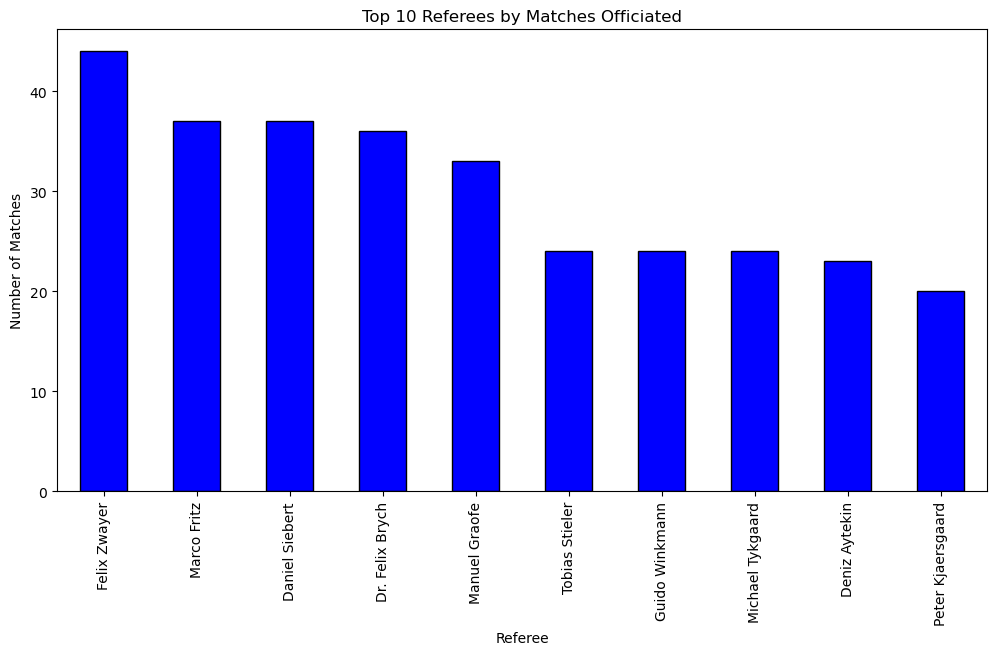

Average Cards Issued by Referee and Competition:
                                                  yellow_cards  red_cards
referee                        competition_type                          
Marijo Strahonja               international_cup      2.000000        0.0
Cuneyt Cakır                   domestic_league        1.666667        0.0
Ilker Meral                    domestic_league        1.000000        0.0
Manuel Graofe                  international_cup      1.000000        0.0
Norbert Grudzinski             domestic_cup           1.000000        0.0
Viktor Kassai                  international_cup      1.000000        0.0
Bas Nijhuis                    international_cup      1.000000        0.0
Tolga A zkalfa                 domestic_league        1.000000        0.0
Ivan Bebek                     international_cup      1.000000        0.0
jose antonio teixeira vitienes domestic_cup           1.000000        0.0
Match duration data is unavailable.
Correlation Between Referee

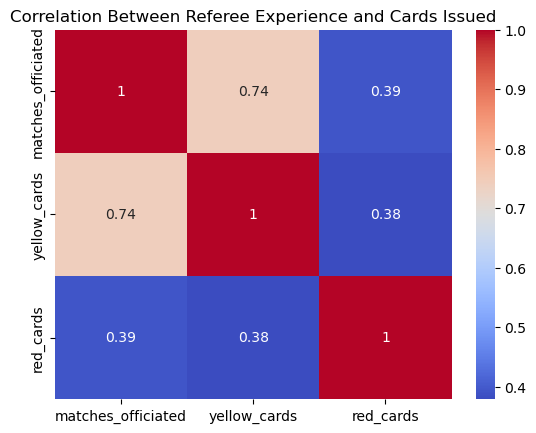

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Football_data_merged_cleaned.csv")

# Q1: Referees with Most Matches
referee_match_count = df['referee'].value_counts()
print("Top 10 Referees by Matches Officiated:")
print(referee_match_count.head(10))

referee_match_count.head(10).plot(kind='bar', figsize=(12, 6), color='blue', edgecolor='black')
plt.title('Top 10 Referees by Matches Officiated')
plt.ylabel('Number of Matches')
plt.xlabel('Referee')
plt.show()

# Q2: Average Cards Issued by Referee and Competition
avg_cards_by_ref_comp = df.groupby(['referee', 'competition_type'])[['yellow_cards', 'red_cards']].mean()
print("Average Cards Issued by Referee and Competition:")
print(avg_cards_by_ref_comp.sort_values(by='yellow_cards', ascending=False).head(10))

# Q3: Average Match Duration
if 'match_duration' in df.columns:
    avg_match_duration = df.groupby('referee')['match_duration'].mean()
    avg_match_duration.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6), color='green', edgecolor='black')
    plt.title('Average Match Duration by Referee')
    plt.ylabel('Match Duration (mins)')
    plt.xlabel('Referee')
    plt.show()
else:
    print("Match duration data is unavailable.")

# Q4: Correlation Between Referee Experience and Cards Issued
referee_experience = df.groupby('referee').agg(
    matches_officiated=('game_id', 'count'),
    yellow_cards=('yellow_cards', 'sum'),
    red_cards=('red_cards', 'sum')
)
correlation = referee_experience.corr()
print("Correlation Between Referee Experience and Cards Issued:")
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Referee Experience and Cards Issued')
plt.show()


In [ ]:
# 2. Substitution Patterns

Average Substitution Time: 62.426437640029874 minutes


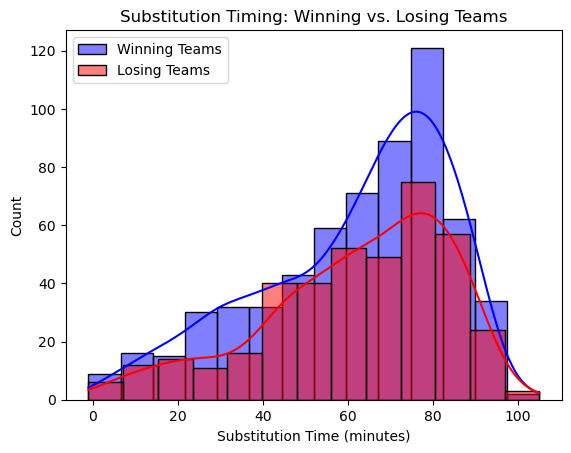

Most Frequently Substituted Players:
player_in_id
234412.627709    597
90466.000000      13
41511.000000      11
32711.000000      10
73013.000000       8
392768.000000      7
1197.000000        7
102226.000000      7
129554.000000      7
85906.000000       7
Name: count, dtype: int64


Goals Scored After Substitutions (After 60th Minute):
                                                 Home Goals After 60th Minute  \
 Lille Olympique Sporting Club                                            4.0   
1. FC Koln                                                                7.0   
1. FSV Mainz 05                                                          16.0   
1.FC Nuremberg                                                           14.0   
AC Ajaccio                                                                0.0   
...                                                                       ...   
Wolverhampton Wanderers Football Club                                     NaN   
bayer 04 leverkusen Football                                              NaN   
eintracht frankfurt Football ag                                           NaN   
ma laga cf                                                                NaN   
tsg 1899 hoffenheim football spielbetriebs Gmbh        

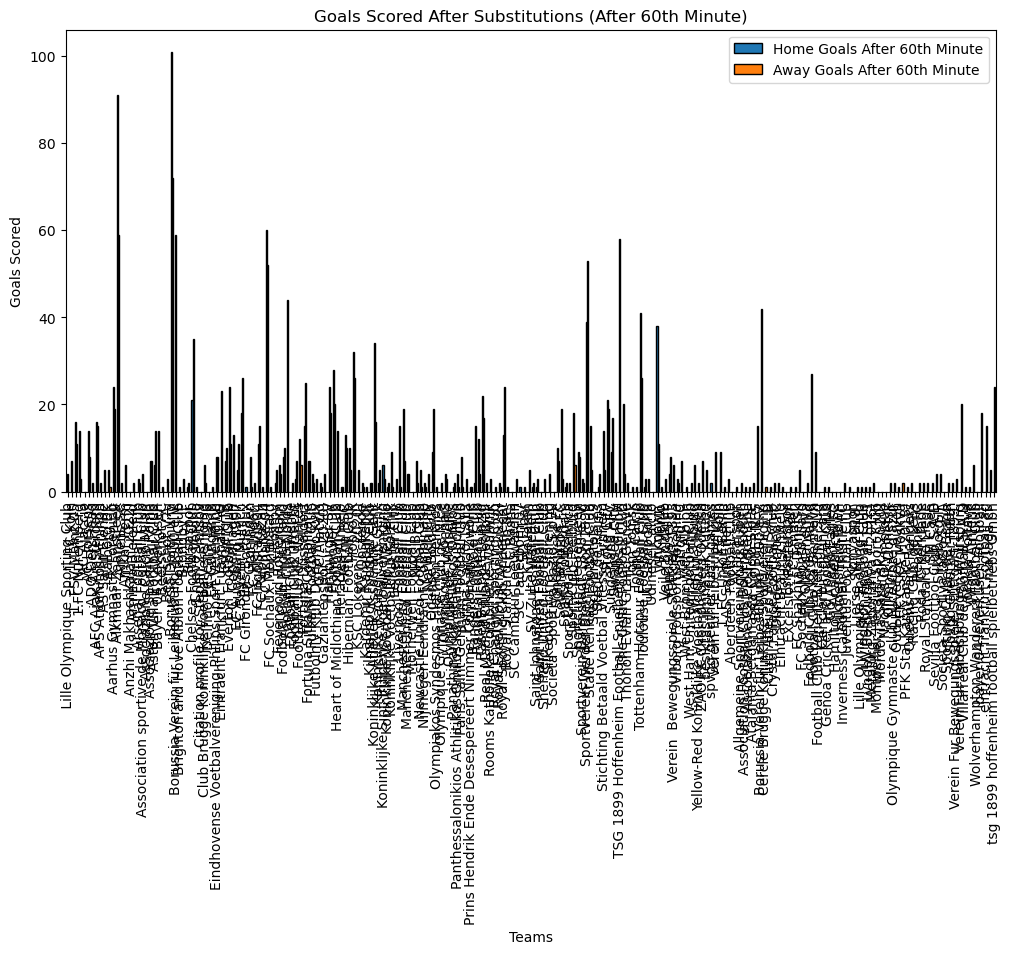

In [11]:
# Q1: Average Time of Substitutions
avg_sub_time = df['minute'].mean()
print(f"Average Substitution Time: {avg_sub_time} minutes")

# Substitution Time for Winning vs. Losing Teams
df['match_result'] = df['home_club_goals'] - df['away_club_goals']
winning_subs = df[df['match_result'] > 0]['minute']
losing_subs = df[df['match_result'] < 0]['minute']

sns.histplot(winning_subs, color='blue', label='Winning Teams', kde=True)
sns.histplot(losing_subs, color='red', label='Losing Teams', kde=True)
plt.legend()
plt.title('Substitution Timing: Winning vs. Losing Teams')
plt.xlabel('Substitution Time (minutes)')
plt.show()

# Q2: Most Frequently Substituted Players
# Based on the dataset, the column for substitutions might be 'player_in_id' (players coming in)
if 'player_in_id' in df.columns:
    most_substituted_players = df['player_in_id'].value_counts().head(10)
    print("Most Frequently Substituted Players:")
    print(most_substituted_players)
    
    most_substituted_players.plot(kind='bar', figsize=(12, 6), color='orange', edgecolor='black')
    plt.title('Top 10 Most Frequently Substituted Players')
    plt.ylabel('Number of Substitutions')
    plt.xlabel('Player ID')
    plt.show()
else:
    print("The column for substitutions ('player_in_id' or similar) is not available in the dataset.")


# Q3: Substitution Timing vs. Goals Scored
# Adjusting to use 'home_club_name' and 'away_club_name' for team representation
if 'minute' in df.columns and 'goals' in df.columns:
    # Filtering for substitutions after the 60th minute
    substitutions_after_60 = df[df['minute'] > 60]

    # Calculating goals for home and away teams
    home_goals_after_subs = substitutions_after_60.groupby('home_club_name')['home_club_goals'].sum()
    away_goals_after_subs = substitutions_after_60.groupby('away_club_name')['away_club_goals'].sum()

    # Combining results
    total_goals_after_subs = pd.concat([home_goals_after_subs, away_goals_after_subs], axis=1)
    total_goals_after_subs.columns = ['Home Goals After 60th Minute', 'Away Goals After 60th Minute']

    print("Goals Scored After Substitutions (After 60th Minute):")
    print(total_goals_after_subs)

    # Plotting
    total_goals_after_subs.plot(kind='bar', figsize=(12, 6), edgecolor='black')
    plt.title('Goals Scored After Substitutions (After 60th Minute)')
    plt.ylabel('Goals Scored')
    plt.xlabel('Teams')
    plt.show()
else:
    print("Required columns ('minute', 'goals', 'home_club_name', 'away_club_name') are missing.")



In [ ]:
# 3. Event Analysis

Most Common Event Types:
event_type
Unknown    1339
Name: count, dtype: int64


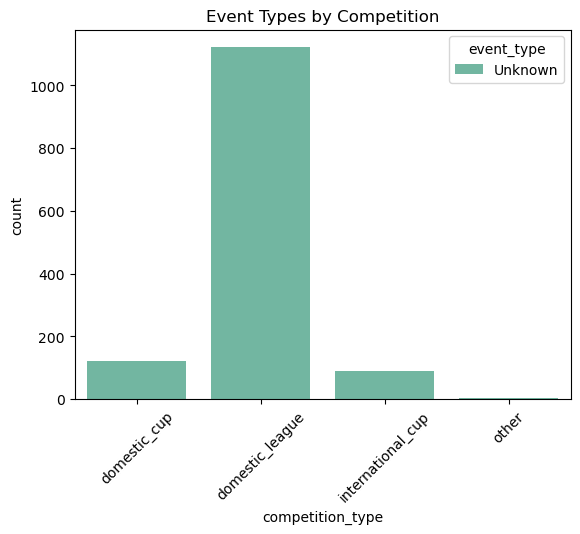

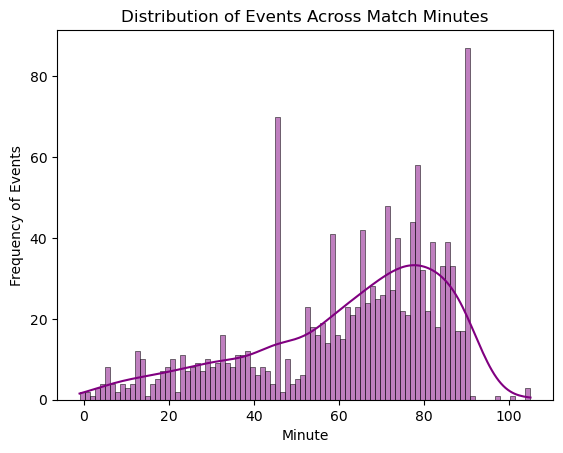

Players Involved in Key Events:
Series([], Name: count, dtype: int64)
Event Types in High Attendance Matches:
event_type
Unknown    644
Name: count, dtype: int64


C:\Users\nagap\AppData\Local\Temp\ipykernel_6976\2613254351.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_attendance_events.index, y=high_attendance_events.values, palette='husl')


In [7]:
# Q1: Common Event Types by Competition
event_type_counts = df['event_type'].value_counts()
print("Most Common Event Types:")
print(event_type_counts)

sns.countplot(data=df, x='competition_type', hue='event_type', palette='Set2')
plt.title('Event Types by Competition')
plt.xticks(rotation=45)
plt.show()

# Q2: Event Distribution by Minute
sns.histplot(df['minute'], bins=90, kde=True, color='purple')
plt.title('Distribution of Events Across Match Minutes')
plt.xlabel('Minute')
plt.ylabel('Frequency of Events')
plt.show()

# Q3: Players Involved in Key Events
key_event_players = df[df['event_type'].isin(['Goal', 'Assist', 'Yellow Card', 'Red Card'])]
key_event_counts = key_event_players['player_name'].value_counts().head(10)
print("Players Involved in Key Events:")
print(key_event_counts)

# Q4: Events in Matches with High Attendance
high_attendance_events = df[df['attendance'] > df['attendance'].mean()]['event_type'].value_counts()
print("Event Types in High Attendance Matches:")
print(high_attendance_events)

sns.barplot(x=high_attendance_events.index, y=high_attendance_events.values, palette='husl')
plt.title('Event Distribution in High Attendance Matches')
plt.ylabel('Event Count')
plt.xlabel('Event Type')
plt.show()


In [ ]:
Referee Analysis: Identifies referees' impact and consistency based on their decision-making trends and match officiating history.
Substitution Patterns: Analyzes strategic decisions related to player substitutions and their impact on match outcomes.
Event Analysis: Examines how match dynamics evolve with events like goals, fouls, and cards, providing insights into team strategies and key performers.